In [66]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import des_functions as des
from more_itertools import locate

datdir = '/home/b7009348/WGL_project/DES-data/'
matched = 'y1_mcal_shapes_matched.fits'
full = 'y1_mcal_flags=0.fits'

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['cmr10']
plt.rcParams['mathtext.fontset'] ='cm'
plt.rcParams['figure.facecolor'] = 'white'
plt.rc('axes', unicode_minus=False)
plt.rc('axes.formatter', use_mathtext=True)

In [80]:
with fits.open(datdir+full) as hdu:
    data = hdu[1].data
    fullid = data['coadd_objects_id']
    e1_full = data['e1']
    r11_full = data['R11']
    fullcov11 = data['covmat_0_0']

with fits.open(datdir+matched) as hdu:
    data = hdu[1].data
    matchid = data['coadd_objects_id']
    e1_match = data['e1']
    r11_match = data['R11']
    matchcov11 = data['covmat_0_0']
    
print(np.size(fullid))
print(np.size(matchid))
del data

34839418
17814587


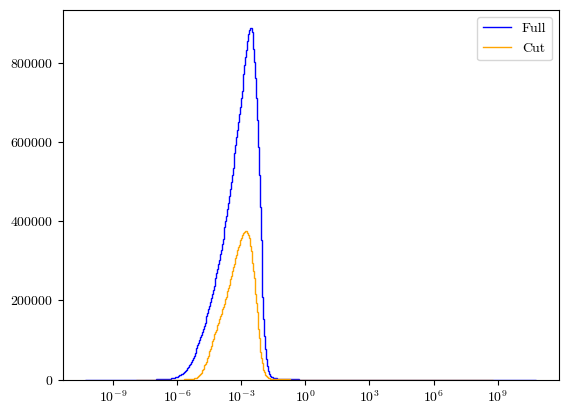

In [86]:
def gram_it(full_data, cut_data, nbins, plot_it=True):
    
    fullCounts, fullBins = np.histogram(full_data, bins=np.logspace(np.log10(np.min(full_data)), np.log10(np.max(full_data)), nbins))
    
    cutCounts, cutBins = np.histogram(cut_data, bins=np.logspace(np.log10(np.min(cut_data)), np.log10(np.max(cut_data)), nbins))
    
    if plot_it==True:
        plt.stairs(fullCounts, fullBins, color='blue')
        plt.stairs(cutCounts, cutBins, color='orange')
        plt.axvline(np.mean(cut_data), color='orange')
        plt.axvline(np.mean(full_data), color='blue')
        plt.xscale('log')
        plt.legend(['Full', 'Cut'])
        plt.show()
        
    return fullCounts, fullBins, cutCounts, cutBins

hist_data = zip(gram_it(fullcov11, matchcov11, 500))

### We start by defining how many galaxies to cut to 'approximate' the matched catalogue

In [76]:
# Store the unique integers in an array
rand_indxs = np.random.choice(np.size(fullid), size=np.size(matchid), replace=False)

cutid = fullid[rand_indxs]

matches, cut_indi, match_indi = np.intersect1d(cutid, matchid, return_indices=True)

In [77]:
print('Similarity = %g percent'%(np.size(matches)/np.size(matchid) * 100))

Similarity = 51.1473 percent


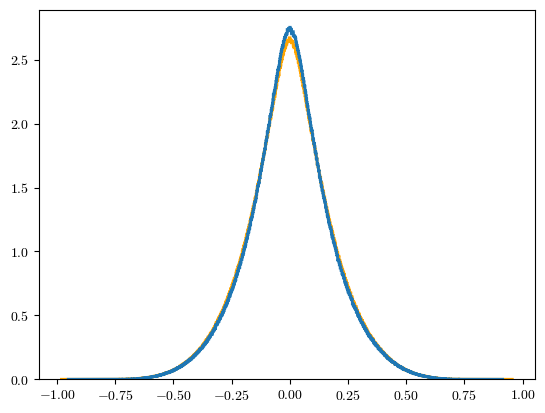

In [78]:
plt.hist(e1_cut, bins=1000, density=True, histtype='step', linewidth=2, color='orange');
plt.hist(e1_match, bins=1000, density=True, histtype='step', linewidth=2);

In [71]:
cut_counts, cut_bins = np.histogram(e1_cut, bins=1000)
full_counts, full_bins = np.histogram(e1_full, bins=1000)

#normalise to get probability dist.
cut_pdf = cut_counts / np.size(e1_cut)
full_pdf = full_counts / np.size(e1_full)

In [72]:
def kl_divergence(p, q):
    """
    Computes the Kullback-Leibler divergence between two distributions p and q.
    """
    p = np.asarray(p, dtype=float)
    q = np.asarray(q, dtype=float)
    p = np.where(p != 0, p, np.finfo(float).eps)
    q = np.where(q != 0, q, np.finfo(float).eps)
    kl_div = np.sum(np.where(p != 0, p * np.log(p / q), 0))
    return kl_div

kl_divergence(cut_pdf, full_pdf)

1.3702784742771048e-05